In [9]:
import torch 
import cv2
import numpy as np
import requests
from PIL import Image, ImageFile
from io import BytesIO
device = torch.device("mps")
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"
resp = requests.get(url)
img = Image.open(BytesIO(resp.content))
img.load()

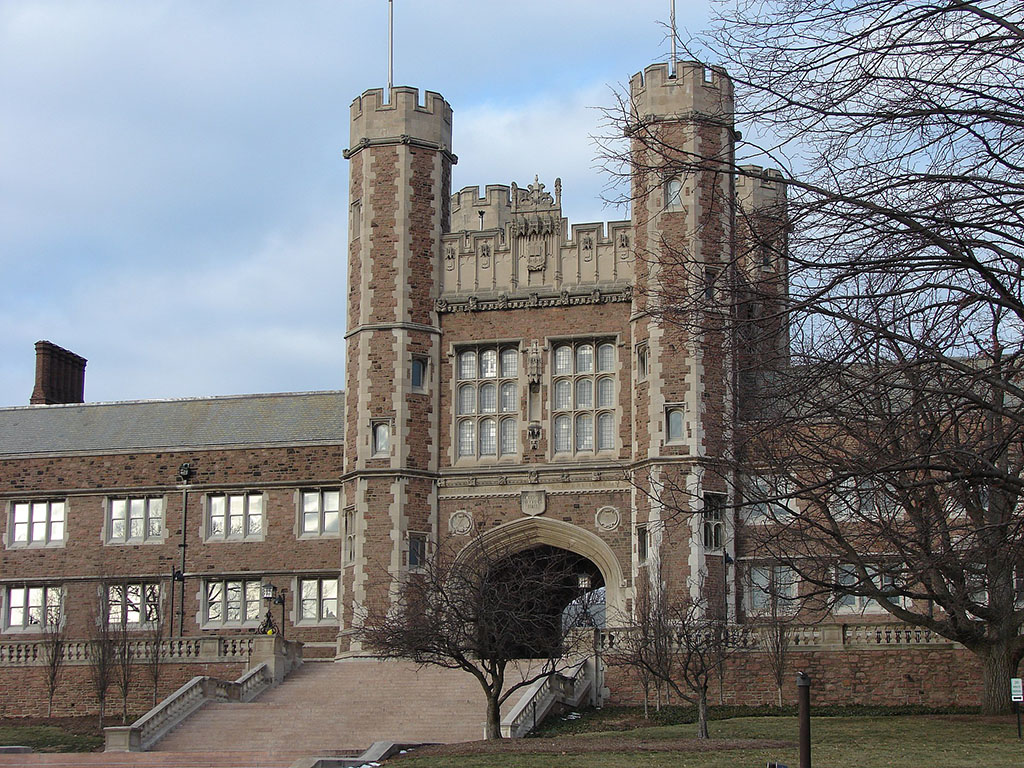

In [18]:
img

In [19]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [20]:
img_arr = np.array(img)

In [21]:
img_arr.shape

(768, 1024, 3)

In [22]:
gray = cv2.cvtColor(img_arr, cv2.COLOR_RGB2GRAY)

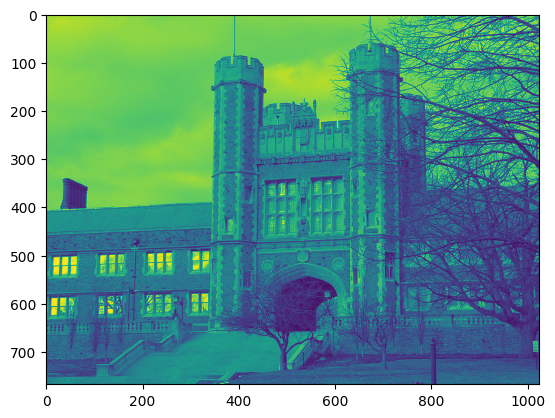

In [23]:
plt.imshow(gray)

### Inference
- One can use PIL to load images and then use cv2 for conversion too
- One can use PIL to display or use matplotlib.pyplot to display

### Standardizing bunch of images from url's

Original Images: 



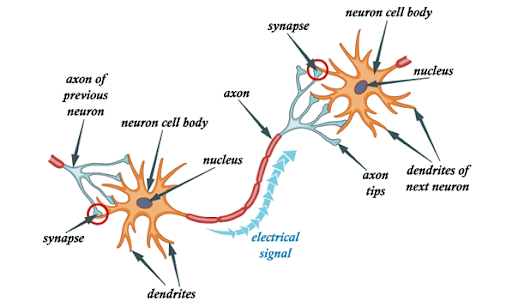

(307, 512, 3)


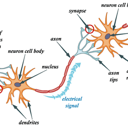

Original Images: 



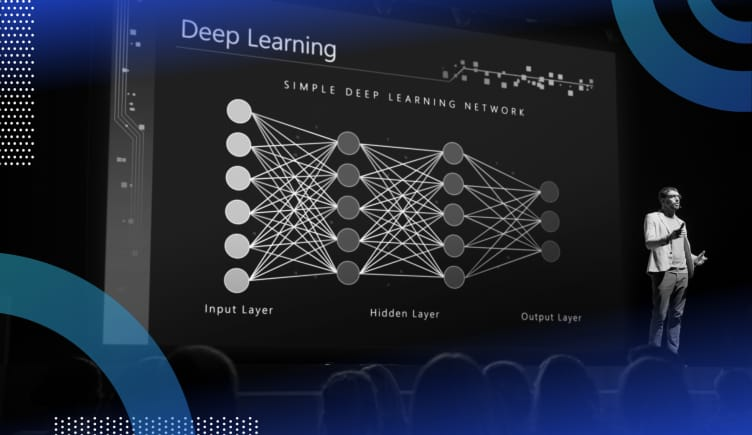

(435, 752, 3)


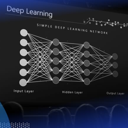

Original Images: 



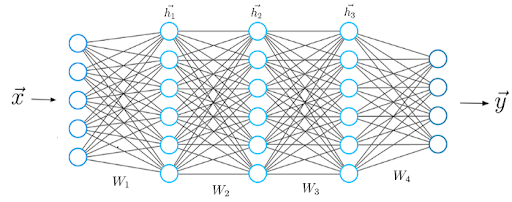

(202, 512, 3)


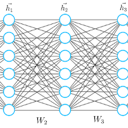

In [32]:
images = [
    'https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/5_what-is-deep-learning.png',
    'https://builtin.com/cdn-cgi/image/f=auto,quality=80,width=752,height=435/https://builtin.com/sites/www.builtin.com/files/styles/byline_image/public/2022-04/what-is-deep-learning.png',
    'https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/2_what-is-deep-learning.png'
]

def crop_img(img):
    w, h = img.size
    # crop the image, centered
    new_w = min(w,h)
    new_h = new_w
    left = (w - new_w)/2
    top = (h -new_h)/2
    right = (w + new_w)/2
    bottom = (h + new_h)/2
    return img.crop((left, top, right, bottom))

for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    print('Original Images: \n')
    display(img)
    img_arr = np.asarray(img)
    print(img_arr.shape)
    img = crop_img(img)
    img = img.resize((128,128))
    display(img)

### Adding noise to an image

In [33]:
def add_noise(img):
    a2 = img.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows, cols) / 20)

    np.random.seed(42)

    for i in range(100):
        x = np.random.randint(cols - s)
        y = np.random.randint(rows - s)
        a2[y : (y+s), x: (x+s)] = 0
    return a2

